In [ ]:
from keras.datasets import mnist,cifar10
from keras.layers import Dense
(X_train,_),(X_test,_)=mnist.load_data()
#(X_train,_),(X_test,_)=cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


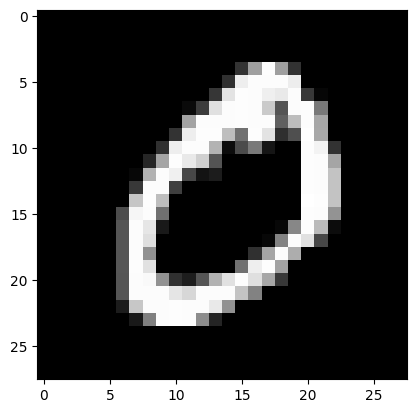

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])
plt.gray()

In [ ]:
#normlaize the image
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [ ]:
import numpy as np
#convert image to array of dimension height*width*3 or height*width
np.prod(X_train.shape[1:])
X_train=X_train.reshape(len(X_train),np.prod(X_train.shape[1:]))
X_test=X_test.reshape(len(X_test),np.prod(X_test.shape[1:]))

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
import keras
input_img=keras.Input(shape=(np.prod(X_train.shape[1:]),))
encoded=Dense(128,activation='relu')(input_img)
encoded=Dense(64,activation='relu')(encoded)
encoded=Dense(32,activation='relu')(encoded)#code layer or bottleneck layer
decoded=Dense(64,activation='relu')(encoded)
decoded=Dense(128,activation='relu')(decoded)
decoded=Dense(np.prod(X_train.shape[1:]),activation='sigmoid')(decoded)
autoencoded=keras.Model(input_img,decoded)
autoencoded.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoded.compile(optimizer='adam',loss='binary_crossentropy')
autoencoded.fit(X_train,X_train,epochs=50,batch_size=256,
                validation_data=(X_test,X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.3386 - val_loss: 0.1602
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1530 - val_loss: 0.1350
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1342 - val_loss: 0.1256
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1251 - val_loss: 0.1186
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1181 - val_loss: 0.1126
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1131 - val_loss: 0.1085
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1089 - val_loss: 0.1052
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1061 - val_loss: 0.1035
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1038 - val_loss: 0.1014
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1024 - val_loss: 0.1004
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1011 - val_loss: 0.0988
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

#batch_size=32,64,256

In [ ]:
reconstructed_image=autoencoded.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


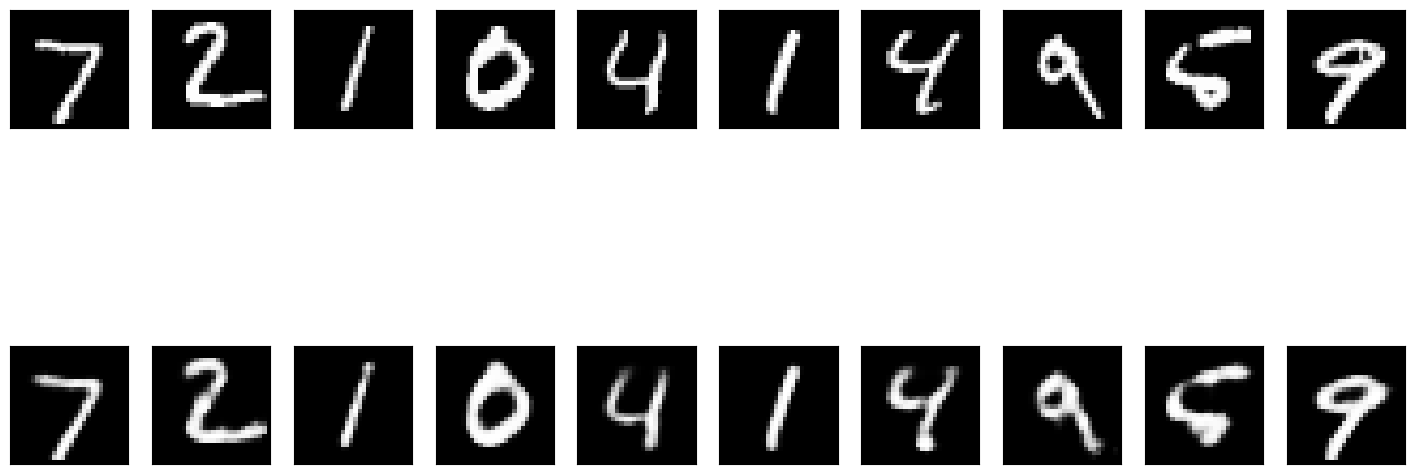

In [ ]:
n=10
plt.figure(figsize=(18,8))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #reconstructed image
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(reconstructed_image[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

